<a href="https://colab.research.google.com/github/Fardeen2351/Comparative-Analysis-of-CNN-and-Transfer-Learning-Using-RAF_DB/blob/main/Facial_emotion_detection_coursework_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

# **MOUNTING THE DATASET FROM DRIVE**

In [ ]:
import os

def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    # Get a list of all entries in the directory
    all_entries = os.listdir(directory_path)

    # Filter out only directories
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]

    return folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIRECTORY = "/content/drive/MyDrive/archive.zip"


# **UNZIP AND EXTRACT YOUR DATASET**

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/archive.zip"   # your zip file path
extract_path = "/content/drive/MyDrive/raf-db"    # folder to extract contents

# Create the folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Extract zip
for file in os.listdir(extract_path):
    file_path = os.path.join(extract_path, file)
    if os.path.isfile(file_path):
        os.remove(file_path)

print("Files extracted to:", extract_path)


Files extracted to: /content/drive/MyDrive/raf-db


# **SETUP YOUR PATH**

In [ ]:
DIRECTORY = "/content/drive/MyDrive/raf-db/DATASET/train"


In [ ]:
import os

def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    all_entries = os.listdir(directory_path)
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]
    return folders

CATAGORIES = []
try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATAGORIES.append(folder)
except ValueError as e:
    print(e)

print("Detected Classes:", CATAGORIES)


Directories in '/content/drive/MyDrive/raf-db/DATASET/train':
Detected Classes: ['1', '2', '3', '4', '5', '6', '7']


In [ ]:
DIRECTORY= r"/content/drive/MyDrive/raf-db/DATASET/train"
CATAGORIES= []
try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATAGORIES.append(folder)
except ValueError as e:
    print(e)

CATAGORIES
# you can rename these class according to the emotion of the folder


Directories in '/content/drive/MyDrive/raf-db/DATASET/train':


['1', '2', '3', '4', '5', '6', '7']

# **CONVERT DATA TO NUMPY ARRAY**

In [ ]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")

      # img_arr=cv2.resize(img_arr,(100,100))

#         data.append([img_arr,label])


Failed to load image /content/drive/MyDrive/raf-db/DATASET/train/1/train_02127_aligned.jpg


In [ ]:
len(data)

12270

# **MERGE TEST DATA INTO TRAINING DATA**


In [ ]:
DIRECTORY= r"/content/drive/MyDrive/raf-db/DATASET/test"
for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")

In [ ]:
len(data)

15338

In [ ]:
#shuffle data for better outcome
random.shuffle(data)

In [ ]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

# **SPLIT TRAINING DATA AND VALIDATION DATA**

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X = np.array(x)
Y = np.array(y)

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)

# Convert numpy arrays to TensorFlow Datasets
train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_data = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

# Optional: Add batching and prefetching for performance
train_data = train_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# **Normalize the image array bw 0-1**

In [ ]:
X=X/255
# X


In [ ]:
X.shape

(15338, 100, 100, 3)

In [ ]:
Y.shape

(15338,)

# **BUILD CNN FROM SCRATCH**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model=Sequential()
model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(7,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**USED EARLY STOPPING TO REDUCE OVERFITTING**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpoint=ModelCheckpoint(r'fer.keras',
                          monitor='val_accuracy',
                          mode='max',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_accuracy',
                        mode='max',
                       min_delta=0.001,
                       patience=20,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

## **TRAIN THE CNN**

In [ ]:
#history_cnn = model.fit(X,Y,epochs=50,validation_split=0.25,callbacks =callbacks)
history_cnn = model.fit(train_data, epochs=50, validation_data=val_data,callbacks=callbacks)

Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3455 - loss: 4.8444
Epoch 1: val_accuracy improved from -inf to 0.44433, saving model to fer.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.3457 - loss: 4.8373 - val_accuracy: 0.4443 - val_loss: 1.5285
Epoch 2/50
357/360 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4710 - loss: 1.4800
Epoch 2: val_accuracy improved from 0.44433 to 0.54185, saving model to fer.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4713 - loss: 1.4793 - val_accuracy: 0.5419 - val_loss: 1.3057
Epoch 3/50
357/360 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5402 - loss: 1.2981
Epoch 3: val_accuracy improved from 0.54185 to 0.58696, saving model to fer.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5405 - loss: 1.2976 - val_accuracy: 0.5870 - val_loss: 1.1851
Epoch 4/50
359/360 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5757 - loss: 1.1857
Epoch 4: val_accuracy improved from 0.58696 to 0.60417

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │        22,407 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,775 (932.72 KB)

 Trainable params: 79,591 (310.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,184 (621.82 KB)

# **ACCURACY AND LOSS COMPARISION**

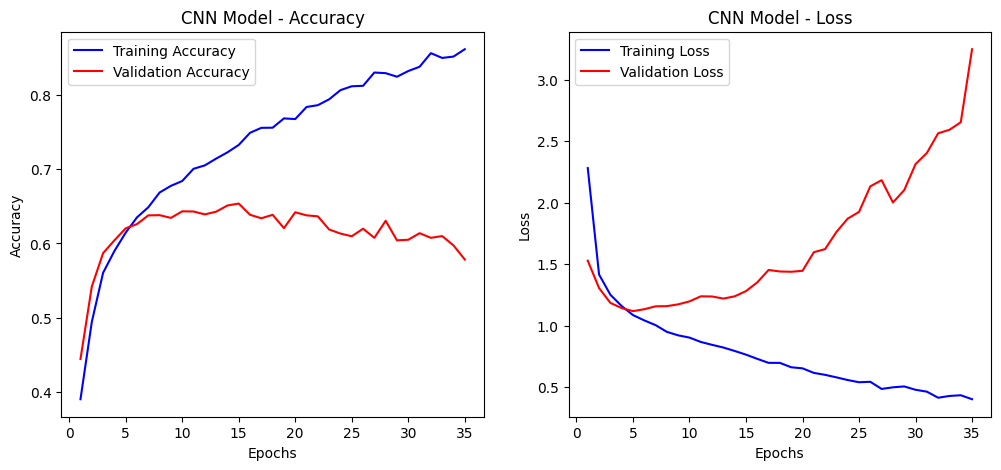

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Example for CNN
plot_history(history_cnn, "CNN Model")

# Example for Transfer Learning
#plot_history(history_tl, "MobileNetV2 (Transfer Learning)")

480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


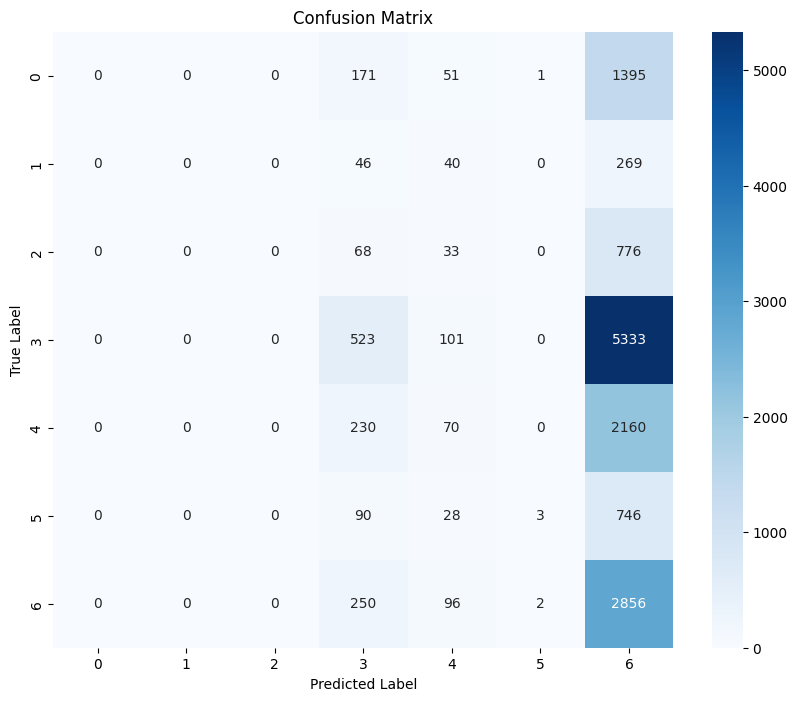

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
# We need to predict on the entire dataset X, as Y contains the corresponding true labels
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1) # Get the class with the highest probability

# Generate confusion matrix
# Y contains the true labels
cm = confusion_matrix(Y, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**SAMPLE OUTPUT COMPARISION**

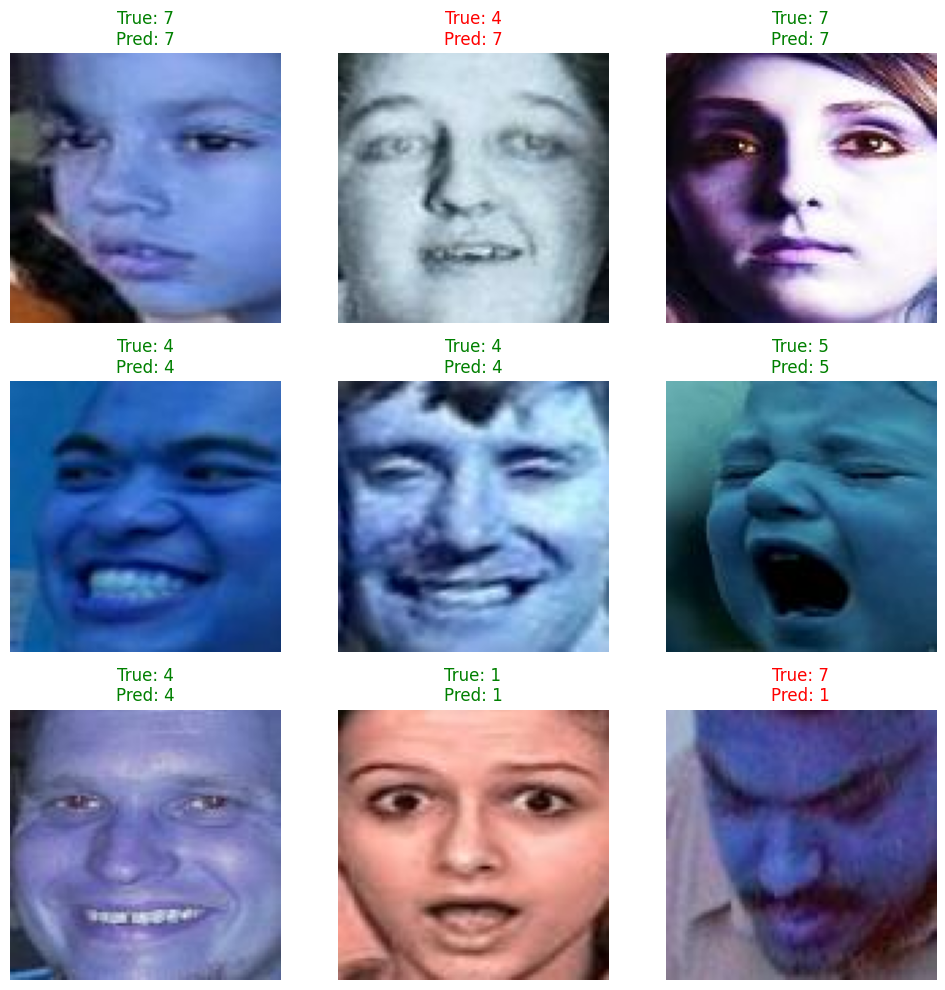

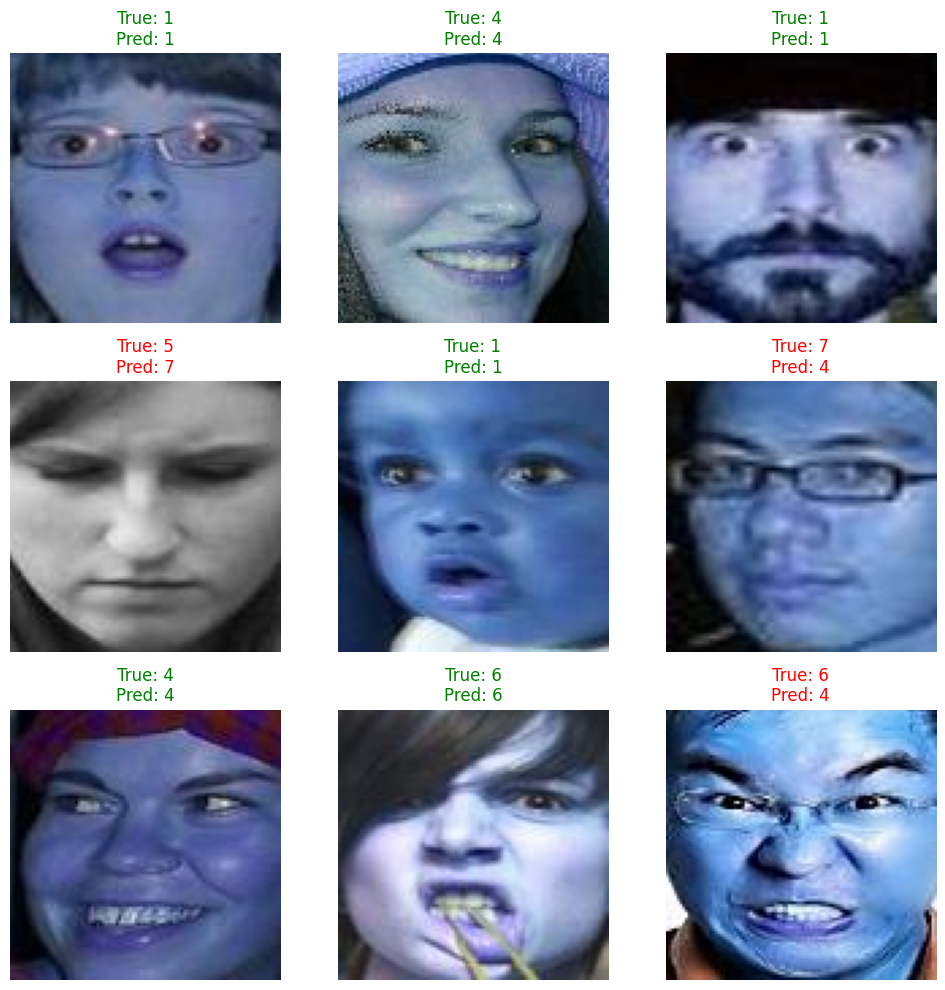

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

# Get a batch of images and labels from the validation data
for images, labels in val_data.take(2): # take one batch
    plt.figure(figsize=(10, 10))
    for i in range(9): # Display the first 9 images in the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Get the predicted class for the image
        img_array = tf.expand_dims(images[i], 0) # Create a batch
        predictions = model.predict(img_array, verbose=0)
        predicted_class_index = np.argmax(predictions[0])
        predicted_label = CATAGORIES[predicted_class_index]

        # Get the true label
        true_label = CATAGORIES[labels[i]]

        color = "green" if predicted_label == true_label else "red"

        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

**PERFORMANCE MATRIX**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming 'y_true' contains the true labels and 'y_pred_classes' contains the predicted class indices
# We need to make sure y_true and y_pred_classes are available from previous steps.
# Based on the notebook state, y_true is created from val_data in cell 9175672b
# y_pred_classes is created from model predictions on the full dataset X in cell Bx3EN95oF5i8

# For a general performance matrix, using the data the confusion matrix was based on (X, Y) is common.
# However, evaluating on the validation data is generally a better practice for reporting performance.
# Let's calculate metrics on the validation data (val_data) to be consistent with typical evaluation.

print("Calculating performance metrics on the validation dataset...")

# Get true labels for the validation data
y_true_val = []
for images, labels in val_data.unbatch():
    y_true_val.append(labels.numpy())
y_true_val = np.array(y_true_val)


# Predict probabilities for the validation data
y_pred_probs_val = model.predict(val_data)
y_pred_classes_val = np.argmax(y_pred_probs_val, axis=1)

# Calculate and print classification report
print("\nClassification Report:")
print(classification_report(y_true_val, y_pred_classes_val, target_names=CATAGORIES)) # Use CATAGORIES for target_names

# Calculate and print individual metrics
print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_true_val, y_pred_classes_val):.4f}")
# For precision, recall, and f1-score, you might want to specify 'average' for multi-class
print(f"Precision (weighted): {precision_score(y_true_val, y_pred_classes_val, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_true_val, y_pred_classes_val, average='weighted'):.4f}")
print(f"F1-Score (weighted): {f1_score(y_true_val, y_pred_classes_val, average='weighted'):.4f}")

# You can also calculate macro or micro averages depending on your needs
# print(f"Precision (macro): {precision_score(y_true_val, y_pred_classes_val, average='macro'):.4f}")
# print(f"Recall (macro): {recall_score(y_true_val, y_pred_classes_val, average='macro'):.4f}")
# print(f"F1-Score (macro): {f1_score(y_true_val, y_pred_classes_val, average='macro'):.4f}")

Calculating performance metrics on the validation dataset...
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.65      0.68       391
           2       0.52      0.26      0.35        92
           3       0.31      0.10      0.15       212
           4       0.77      0.85      0.81      1502
           5       0.53      0.50      0.51       643
           6       0.52      0.34      0.41       209
           7       0.56      0.69      0.62       786

    accuracy                           0.65      3835
   macro avg       0.56      0.48      0.50      3835
weighted avg       0.64      0.65      0.64      3835


Individual Metrics:
Accuracy: 0.6537
Precision (weighted): 0.6364
Recall (weighted): 0.6537
F1-Score (weighted): 0.6380


# **ROC CURVE**

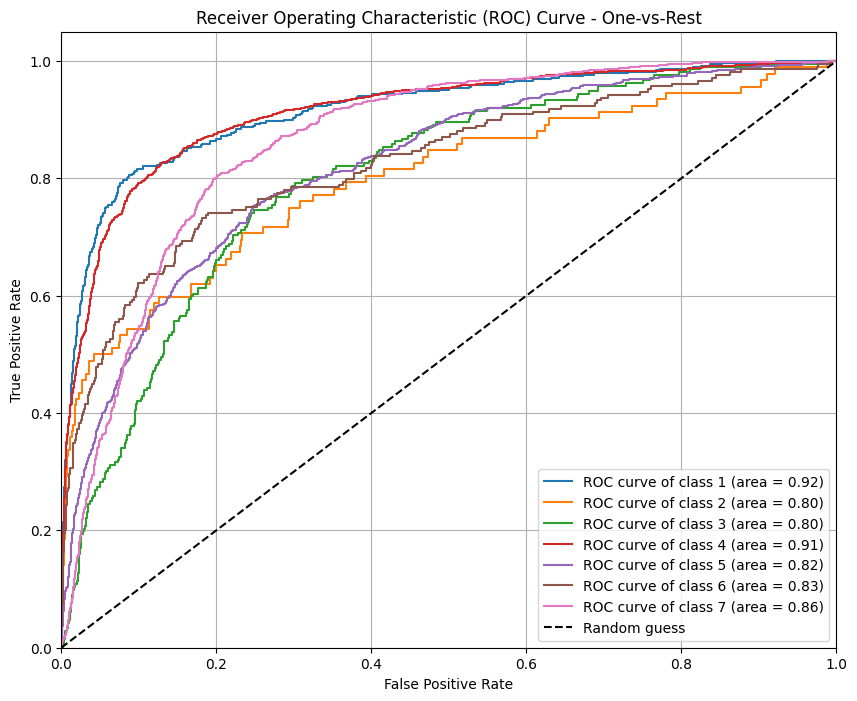

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_true_val (true labels) and y_pred_probs_val (predicted probabilities)
# are available from the previous performance metrics calculation cell (PkWpaayHGpHw)

# Binarize the true labels for one-vs-rest ROC
y_true_bin = label_binarize(y_true_val, classes=np.arange(len(CATAGORIES))) # Use CATAGORIES for classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(CATAGORIES)): # Use CATAGORIES
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(CATAGORIES)): # Use CATAGORIES
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {CATAGORIES[i]} (area = {roc_auc[i]:.2f})') # Use CATAGORIES

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

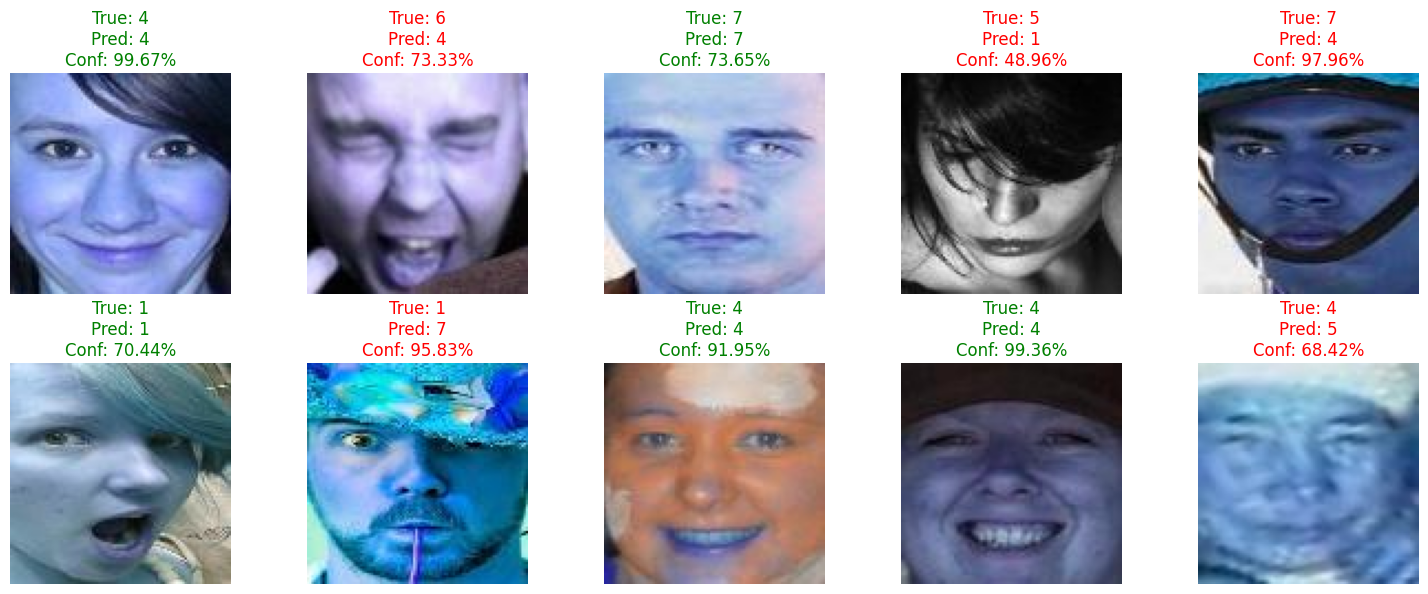

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

# Assuming val_data, y_true_val, y_pred_classes_val, y_pred_probs_val, and CATAGORIES are available

# Get all images and labels from the validation dataset
all_val_images = []
all_val_labels = []

# Use .unbatch() to get individual elements
for images, labels in val_data.unbatch():
    all_val_images.append(images.numpy())
    all_val_labels.append(labels.numpy())

all_val_images = np.array(all_val_images)
all_val_labels = np.array(all_val_labels)

# Get a list of all indices from the validation dataset
all_indices = np.arange(len(y_true_val))

# Choose random indices from the validation dataset
num_images_to_display = 10
random_indices = np.random.choice(all_indices, num_images_to_display, replace=False)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(random_indices):
    # Access the image and true label using the random index
    image = all_val_images[idx]
    true_class = CATAGORIES[all_val_labels[idx]] # Use CATAGORIES

    # Access the predicted class and confidence using the random index
    pred_class = CATAGORIES[y_pred_classes_val[idx]] # Use CATAGORIES
    confidence = np.max(y_pred_probs_val[idx]) * 100

    # Plotting
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(image.astype("uint8"))
    ax.axis('off')
    color = "green" if pred_class == true_class else "red"
    ax.set_title(f'True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}%', color=color)

plt.tight_layout()
plt.show()

# **ResNet50(Transfer Learning Model)**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input

# Load the ResNet50 model with pre-trained ImageNet weights
# Include_top=False removes the fully-connected layer at the top,
# which is used for classification in the original ImageNet task.
# We will add our own classification layers later.
# Input_shape should match the shape of your images (height, width, channels)
# Make sure to use the same image dimensions as you used for your data preparation (100, 100, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Display the model summary to see the layers
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Add new classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a Global Average Pooling layer
predictions = Dense(len(CATAGORIES), activation='softmax')(x) # Add a dense layer with the number of classes and softmax activation

# Create the new model
model_tl = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Display the model summary to see the new layers and frozen layers
model_tl.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 23,602,055 (90.03 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model_tl.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_tl.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 23,602,055 (90.03 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

# **ADDING CHECKPOINTS AND EARLYSTOPPING AND FOR FREEZED BASE OF ResNet50**

In [ ]:
# Define callbacks for ModelCheckpoint and EarlyStopping for the transfer learning model
checkpoint_tl = ModelCheckpoint(r'resnet50_transfer_learning.keras',
                          monitor='val_accuracy',
                          mode='max',
                          save_best_only=True,
                          verbose=1)

earlystop_tl = EarlyStopping(monitor='val_accuracy',
                        mode='max',
                       min_delta=0.001,
                       patience=10, # You can adjust patience based on your needs
                       verbose=1,
                       restore_best_weights=True)

callbacks_tl = [checkpoint_tl, earlystop_tl]

# Train the model with the new layers
# You can adjust the number of epochs and batch size as needed
history_tl = model_tl.fit(train_data,
                          epochs=20, # Start with a relatively small number of epochs
                          validation_data=val_data,
                          callbacks=callbacks_tl)

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4499 - loss: 1.6059
Epoch 1: val_accuracy improved from -inf to 0.55567, saving model to resnet50_transfer_learning.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.4500 - loss: 1.6054 - val_accuracy: 0.5557 - val_loss: 1.2559
Epoch 2/20
358/360 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5701 - loss: 1.1867
Epoch 2: val_accuracy improved from 0.55567 to 0.58018, saving model to resnet50_transfer_learning.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.5702 - loss: 1.1866 - val_accuracy: 0.5802 - val_loss: 1.2107
Epoch 3/20
359/360 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6094 - loss: 1.0831
Epoch 3: val_accuracy improved from 0.58018 to 0.59557, saving model to resnet50_transfer_learning.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.6094 - loss: 1.0830 - val_accuracy: 0.5956 - val_loss: 1.1939
Epoch 4/20
359/360 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.635

In [ ]:
# Evaluate the transfer learning model on the validation data
print("Evaluating the transfer learning model on the validation dataset...")
loss_tl, accuracy_tl = model_tl.evaluate(val_data)

print(f"Transfer Learning Model - Validation Loss: {loss_tl:.4f}")
print(f"Transfer Learning Model - Validation Accuracy: {accuracy_tl:.4f}")

Evaluating the transfer learning model on the validation dataset...
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6226 - loss: 1.1546
Transfer Learning Model - Validation Loss: 1.1942
Transfer Learning Model - Validation Accuracy: 0.6031


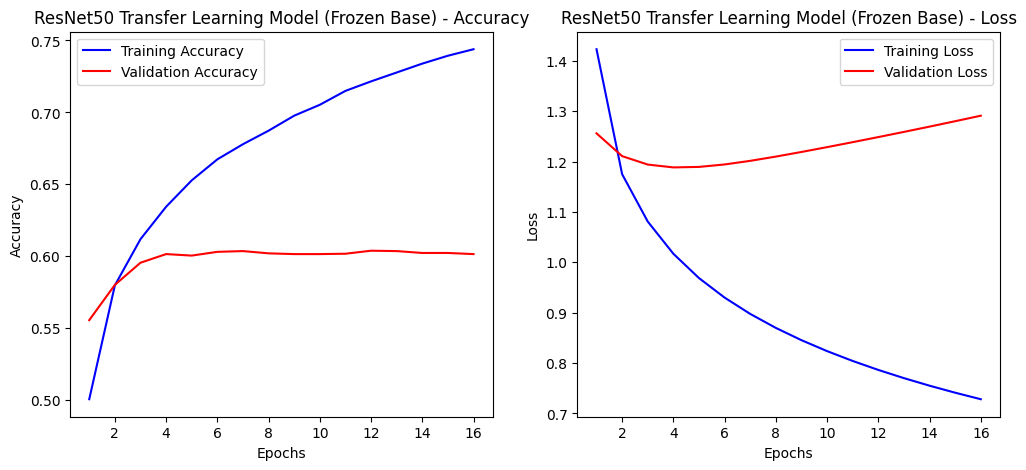

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot history for the transfer learning model
plot_history(history_tl, "ResNet50 Transfer Learning Model (Frozen Base)")

120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step


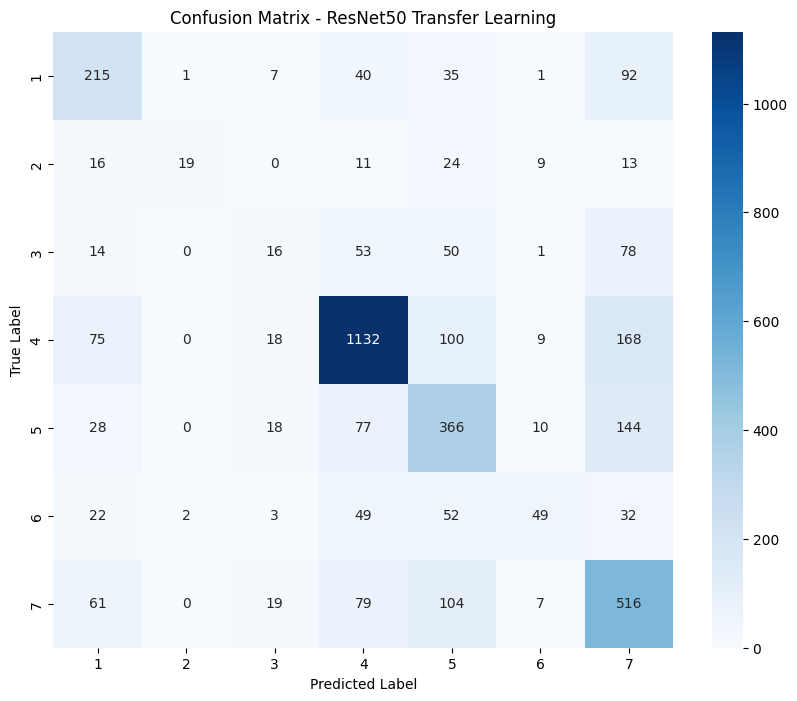


Classification Report - ResNet50 Transfer Learning:
              precision    recall  f1-score   support

           1       0.50      0.55      0.52       391
           2       0.86      0.21      0.33        92
           3       0.20      0.08      0.11       212
           4       0.79      0.75      0.77      1502
           5       0.50      0.57      0.53       643
           6       0.57      0.23      0.33       209
           7       0.49      0.66      0.56       786

    accuracy                           0.60      3835
   macro avg       0.56      0.44      0.45      3835
weighted avg       0.61      0.60      0.59      3835



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get true labels for the validation data (assuming y_true_val is available from previous steps)
# If not available, uncomment the following lines to regenerate it:
# y_true_val = []
# for images, labels in val_data.unbatch():
#     y_true_val.append(labels.numpy())
# y_true_val = np.array(y_true_val)


# Get predicted classes for the validation data (assuming y_pred_classes_val is available from previous steps)
# If not available, uncomment the following lines to regenerate it:
y_pred_probs_val = model_tl.predict(val_data)
y_pred_classes_val = np.argmax(y_pred_probs_val, axis=1)


# Generate confusion matrix
cm_tl = confusion_matrix(y_true_val, y_pred_classes_val)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tl, annot=True, fmt='d', cmap='Blues', xticklabels=CATAGORIES, yticklabels=CATAGORIES) # Use CATAGORIES for labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ResNet50 Transfer Learning')
plt.show()

# Print classification report
print("\nClassification Report - ResNet50 Transfer Learning:")
print(classification_report(y_true_val, y_pred_classes_val, target_names=CATAGORIES)) # Use CATAGORIES for target_names

# **COMPARING FROZEN ResNet50 WITH CNN**

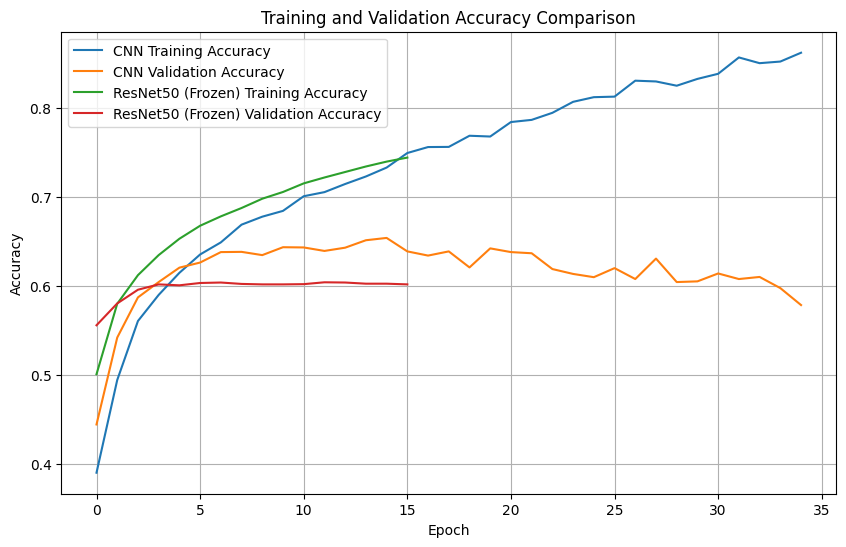

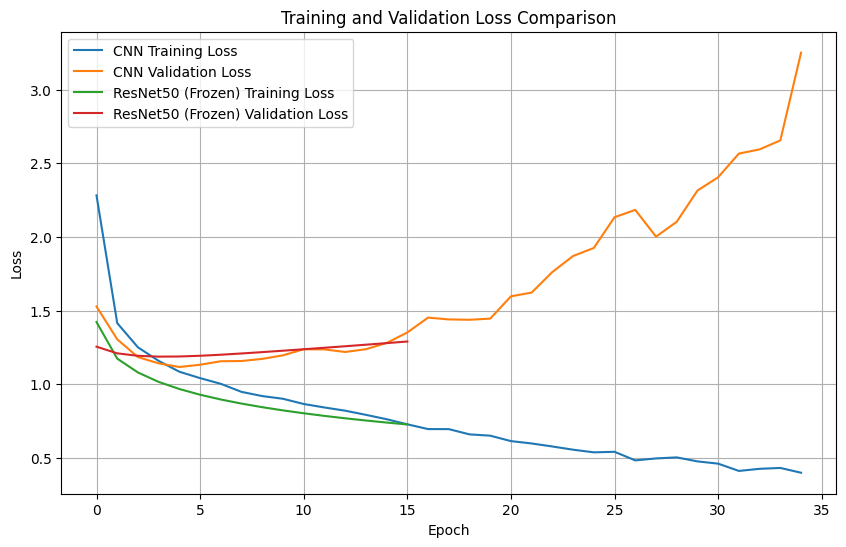

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history_cnn' and 'history_tl' are available from previous training steps

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_tl.history['accuracy'], label='ResNet50 (Frozen) Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='ResNet50 (Frozen) Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.plot(history_tl.history['loss'], label='ResNet50 (Frozen) Training Loss')
plt.plot(history_tl.history['val_loss'], label='ResNet50 (Frozen) Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**SAMPLE OUTPUT OF TL**

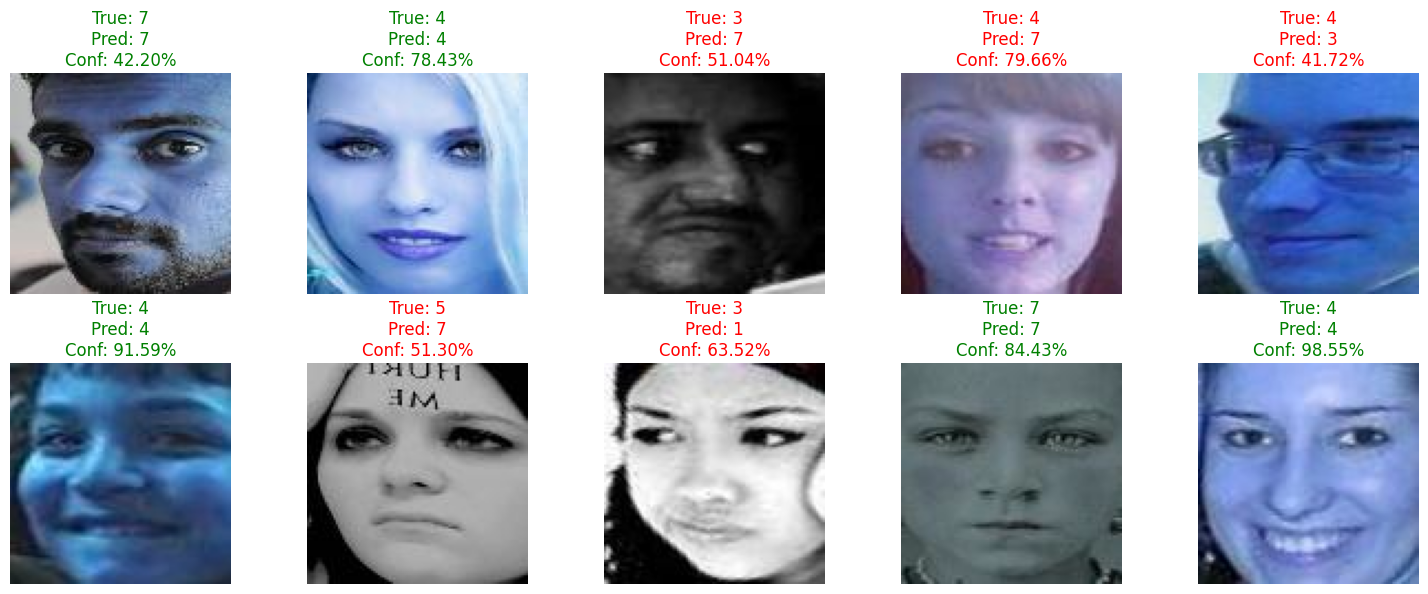

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

# Assuming val_data, y_true_val, y_pred_classes_val, y_pred_probs_val, and CATAGORIES are available

# Get all images and labels from the validation dataset
all_val_images = []
all_val_labels = []

# Use .unbatch() to get individual elements
for images, labels in val_data.unbatch():
    all_val_images.append(images.numpy())
    all_val_labels.append(labels.numpy())

all_val_images = np.array(all_val_images)
all_val_labels = np.array(all_val_labels)

# Get a list of all indices from the validation dataset
all_indices = np.arange(len(y_true_val))

# Choose random indices from the validation dataset
num_images_to_display = 10
random_indices = np.random.choice(all_indices, num_images_to_display, replace=False)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(random_indices):
    # Access the image and true label using the random index
    image = all_val_images[idx]
    true_class = CATAGORIES[all_val_labels[idx]] # Use CATAGORIES

    # Access the predicted class and confidence using the random index
    pred_class = CATAGORIES[y_pred_classes_val[idx]] # Use CATAGORIES
    confidence = np.max(y_pred_probs_val[idx]) * 100

    # Plotting
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(image.astype("uint8"))
    ax.axis('off')
    color = "green" if pred_class == true_class else "red"
    ax.set_title(f'True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}%', color=color)

plt.tight_layout()
plt.show()

# **UNFREEZING SOME LAYERS OF BASE MODEL FOR FINE-TUNING**

In [ ]:
# Unfreeze some layers of the base model for fine-tuning
# It's common to unfreeze the later layers as they are more task-specific
# You can experiment with how many layers to unfreeze

# First, unfreeze the entire base model
base_model.trainable = True

# Then, selectively freeze layers if you only want to fine-tune the later ones
# For example, to freeze the first 100 layers:
# for layer in base_model.layers[:100]:
#     layer.trainable = False

# Display the model summary again to see which layers are now trainable
model_tl.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 25,    │      1,024 │ conv2_block1_3_c

 Total params: 23,630,743 (90.14 MB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 28,688 (112.07 KB)

# **TRAIN THE FINE TUNE MODEL**

In [ ]:
# Evaluate the fine-tuned transfer learning model on the validation data
print("Evaluating the fine-tuned transfer learning model on the validation dataset...")
loss_tl_fine_tune, accuracy_tl_fine_tune = model_tl.evaluate(val_data)

print(f"Fine-tuned Transfer Learning Model - Validation Loss: {loss_tl_fine_tune:.4f}")
print(f"Fine-tuned Transfer Learning Model - Validation Accuracy: {accuracy_tl_fine_tune:.4f}")

# Train the fine-tuned model and store the history
# You can adjust the number of epochs and batch size as needed
# Use the same callbacks as before, or define new ones if needed for fine-tuning
history_tl_fine_tune = model_tl.fit(train_data,
                                     epochs=20, # Start with a relatively small number of epochs for fine-tuning
                                     validation_data=val_data,
                                     callbacks=callbacks_tl)

Evaluating the fine-tuned transfer learning model on the validation dataset...
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6226 - loss: 1.1546
Fine-tuned Transfer Learning Model - Validation Loss: 1.1942
Fine-tuned Transfer Learning Model - Validation Accuracy: 0.6031
Epoch 1/20
358/360 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6753 - loss: 0.8981
Epoch 1: val_accuracy did not improve from 0.60391
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.6753 - loss: 0.8982 - val_accuracy: 0.5992 - val_loss: 1.2038
Epoch 2/20
359/360 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6875 - loss: 0.8635
Epoch 2: val_accuracy did not improve from 0.60391
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.6875 - loss: 0.8635 - val_accuracy: 0.6023 - val_loss: 1.2164
Epoch 3/20
358/360 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6996 - loss: 0.8362
Epoch 3: val_accuracy did not improve from 0.60391
360/360 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.6995 - los

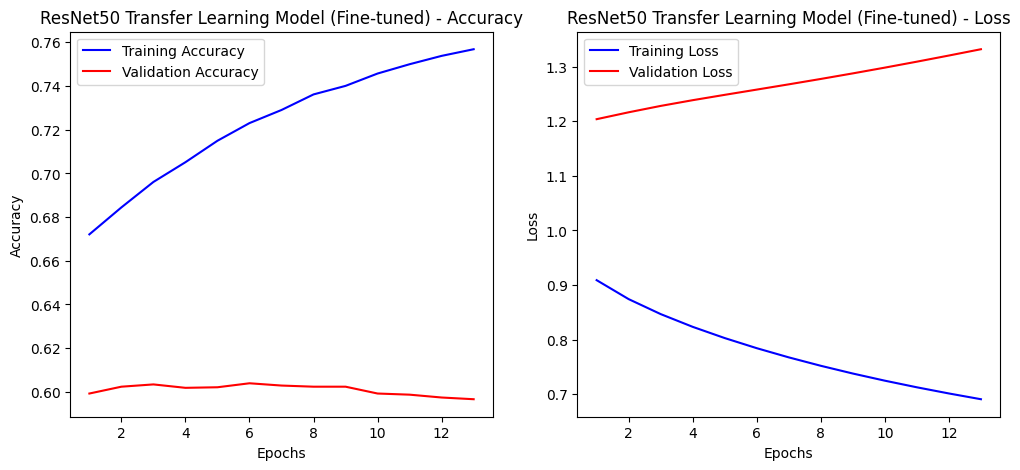

In [ ]:
# Plot history for the fine-tuned transfer learning model
plot_history(history_tl_fine_tune, "ResNet50 Transfer Learning Model (Fine-tuned)")

# **COMPARISION PLOT FOR ALL THE 3 MODELS**

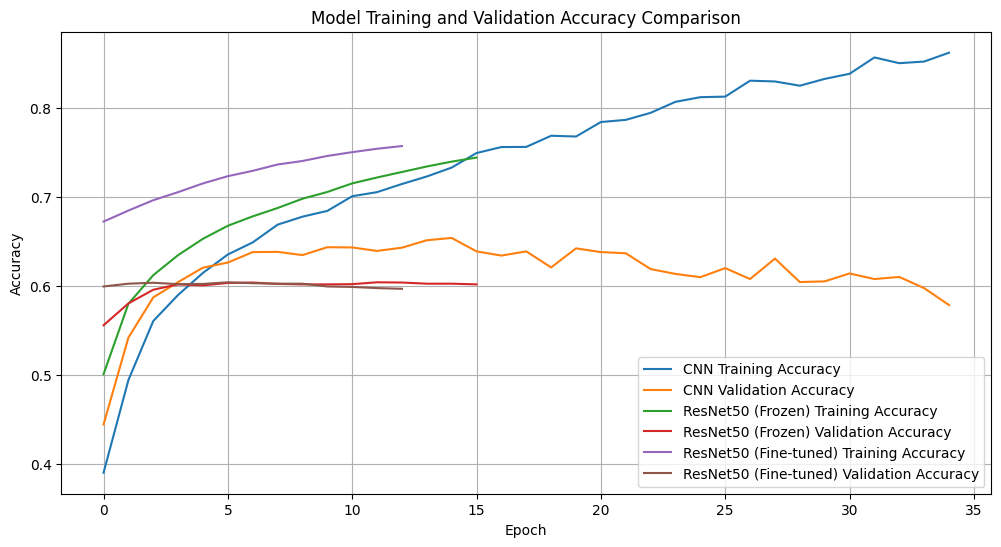

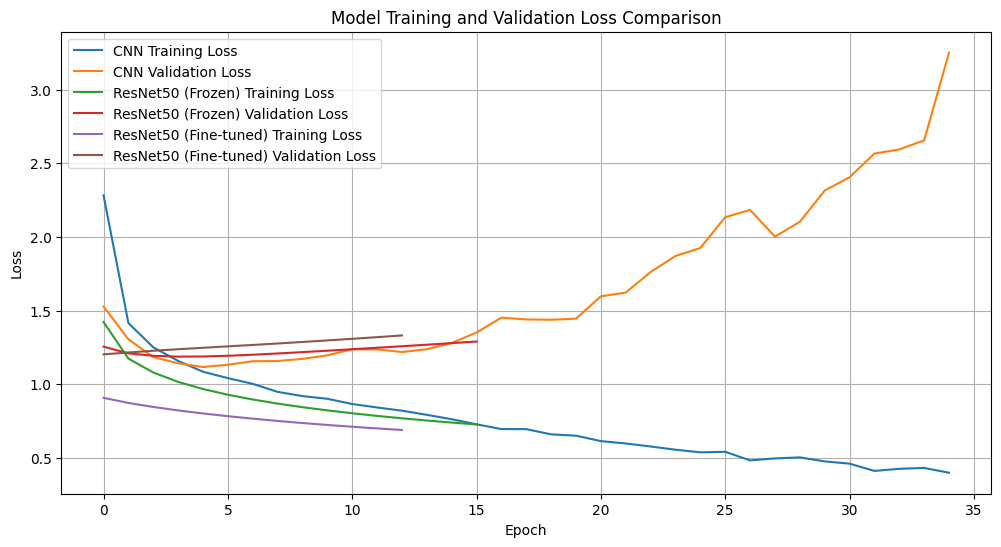

In [ ]:
import matplotlib.pyplot as plt

# Assuming history_cnn, history_tl (frozen), and history_tl_fine_tune are available

# Plot Training and Validation Accuracy Comparison
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_tl.history['accuracy'], label='ResNet50 (Frozen) Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='ResNet50 (Frozen) Validation Accuracy')
plt.plot(history_tl_fine_tune.history['accuracy'], label='ResNet50 (Fine-tuned) Training Accuracy')
plt.plot(history_tl_fine_tune.history['val_accuracy'], label='ResNet50 (Fine-tuned) Validation Accuracy')

plt.title('Model Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss Comparison
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.plot(history_tl.history['loss'], label='ResNet50 (Frozen) Training Loss')
plt.plot(history_tl.history['val_loss'], label='ResNet50 (Frozen) Validation Loss')
plt.plot(history_tl_fine_tune.history['loss'], label='ResNet50 (Fine-tuned) Training Loss')
plt.plot(history_tl_fine_tune.history['val_loss'], label='ResNet50 (Fine-tuned) Validation Loss')

plt.title('Model Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()